In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn import neighbors

from sklearn import model_selection
from sklearn import preprocessing
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve


# Modélisation df initial

## Classification df initial

Score entrainement :  0.5097836478510267
Score test :  0.49414967682939503


Prédictions,1,2,3,4
Réalité,,,,
1,1778,1107,1177,2798
2,830,2835,2378,3582
3,536,1268,4805,6961
4,268,750,2685,14359


              precision    recall  f1-score   support

           1       0.52      0.26      0.35      6860
           2       0.48      0.29      0.36      9625
           3       0.44      0.35      0.39     13570
           4       0.52      0.79      0.63     18062

    accuracy                           0.49     48117
   macro avg       0.49      0.43      0.43     48117
weighted avg       0.49      0.49      0.47     48117



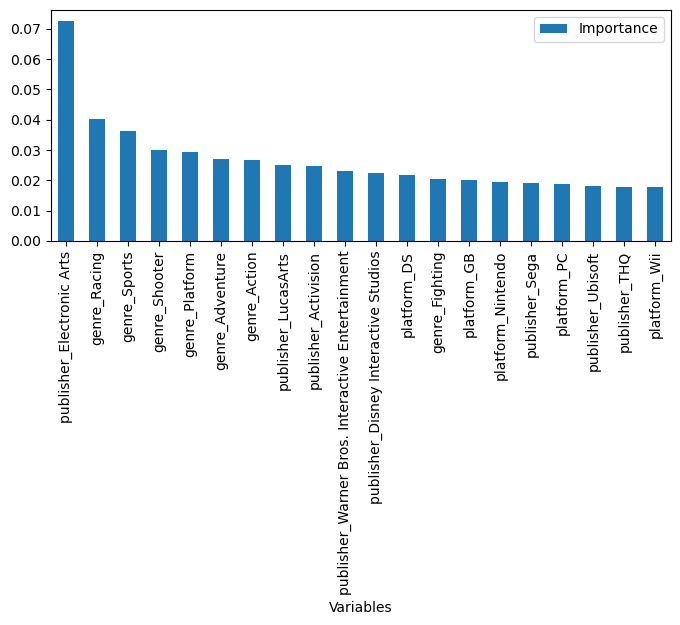

In [3]:
df = pd.read_csv('vg_sales_clean.csv', index_col = 'Name')
df = df.drop("Unnamed: 0", axis = 1)

# Création d'une variable cible basée sur Global_Sales
df['y'] = pd.qcut(df['Global_Sales'], q = [0, 0.25, 0.5, 0.75, 1], labels = [1,2,3,4])

# 1 = faible succes ; 2 = succès moyen ; 3 = succès ;  4 = gros succès

# Dichotomisation des variables catégorielles
publisher = pd.get_dummies(df['Publisher'], prefix = 'publisher')
platform = pd.get_dummies(df['Platform'], prefix = 'platform')
genre = pd.get_dummies(df['Genre'], prefix = 'genre')

# Ajout des colonnes dichotomisée au DataFrame
df = df.join(publisher)
df = df.join(platform)
df = df.join(genre)

# Suppression des colonnes inutiles
df = df.drop(['Publisher','Platform','Genre', 'Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis = 1)
# Features et target
X = df.drop('y', axis = 1)
Y = df['y']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)


# Scaler
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Instanciation modele
clf = DecisionTreeClassifier()

# Entrainement
clf.fit(X_train_sc, y_train)

# Prédiction
y_pred_clf = clf.predict(X_test_sc)

# Score
print('Score entrainement : ', clf.score(X_train_sc, y_train))
print('Score test : ', clf.score(X_test_sc, y_test))

# Matrice de confusion Decision Tree
display(pd.crosstab(y_test, y_pred_clf, rownames = ['Réalité'], colnames = ['Prédictions']))
print(classification_report(y_test, y_pred_clf))

# Importances des features
feat_importance = pd.DataFrame({'Variables' : X.columns, 'Importance' : clf.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False).nlargest(20, "Importance")
feat_importance.plot.bar(x="Variables",y="Importance",figsize=(8,3));



## Régression df initial

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test,R² train,R² test
Decision Tree,0.712995,0.729937,1.981936,2.117204,1.407813,1.455062,0.196304,0.18961


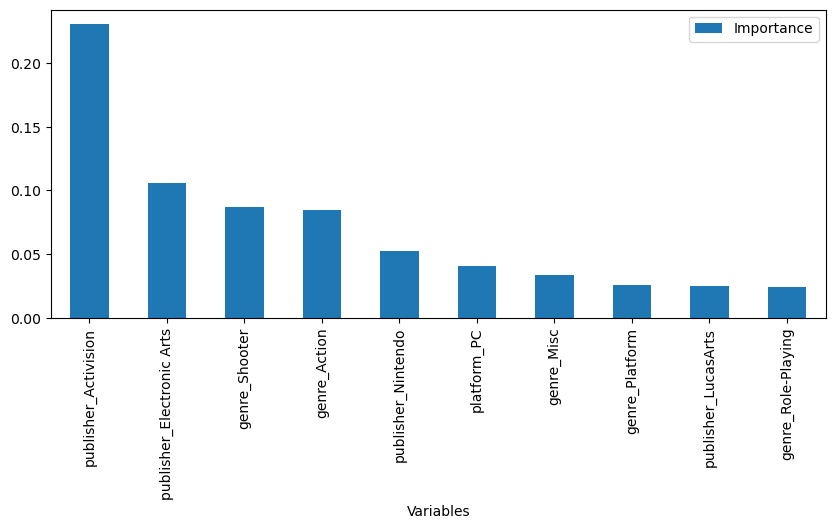

In [4]:
df = pd.read_csv('vg_sales_clean.csv', index_col = 'Name')
df = df.drop("Unnamed: 0", axis = 1)

# Dichotomisation des variables catégorielles
publisher = pd.get_dummies(df['Publisher'], prefix = 'publisher')
platform = pd.get_dummies(df['Platform'], prefix = 'platform')
genre = pd.get_dummies(df['Genre'], prefix = 'genre')

# Ajout des colonnes dichotomisée au DataFrame
df = df.join(publisher)
df = df.join(platform)
df = df.join(genre)

# Suppression des colonnes inutiles
df = df.drop(['Publisher','Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis = 1)

# Features et target
X = df.drop('Global_Sales', axis = 1)
Y = df['Global_Sales']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)


# Scaler
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

##### MODELE ARBRE DE DECISION REGRESSION

dtr = DecisionTreeRegressor() 
dtr.fit(X_train_sc, y_train)

y_pred_decision_tree = dtr.predict(X_test_sc)
y_pred_train_decision_tree = dtr.predict(X_train_sc)

##### Métriques

# jeu d'entraînement
r2_decision_tree_train = dtr.score(X_train_sc,y_train)
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)


# jeu de test 
r2_decision_tree_test = dtr.score(X_test_sc, y_test)
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)

# Creation d'un dataframe pour comparer les metriques 
data = {'MAE train': mae_decision_tree_train,
        'MAE test': mae_decision_tree_test,
        'MSE train': mse_decision_tree_train,
        'MSE test': mse_decision_tree_test,
        'RMSE train': rmse_decision_tree_train,
        'RMSE test': rmse_decision_tree_test,
        'R² train' : r2_decision_tree_train, 
        'R² test':r2_decision_tree_test}
  
# DataFrame de metrics
df = pd.DataFrame(data, index = ['Decision Tree'])


##### Importances des features
feat_importance = pd.DataFrame({'Variables' : X.columns, 'Importance' : dtr.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False).nlargest(10, "Importance")
feat_importance.plot.bar(x="Variables",y="Importance",figsize=(10,4));

df.head()

# Modélisation df final

## Classification

In [5]:
df = pd.read_csv("vg_mc_jv.csv", index_col = 'Name') # colonne Name en indice

# Création d'une variable cible basée sur Global_Sales

df['y'] = pd.qcut(df['Global_Sales'], q = [0, 0.25, 0.5, 0.75, 1], labels = [1,2,3,4])

# On cherche à définir le succès d'un jeu sur la base suivante:
# 1 = faible succes ; 2 = succès moyen ; 3 = succès ;  4 = gros succès

# Dichotomisation des variables catégorielles
publisher = pd.get_dummies(df['Publisher'], prefix = 'publisher')
platform = pd.get_dummies(df['Platform'], prefix = 'platform')
genre = pd.get_dummies(df['Genre'], prefix = 'genre')

# Ajout des colonnes dichotomisée au DataFrame
df = df.join(publisher)
df = df.join(platform)
df = df.join(genre)

# Homogénéisation du barème des notes (tout est ramené sur 10)

df['Test_MC'] = df['Test_MC'] / 10
df['Test_JV'] = df['Test_JV'] / 2
df['Players_JV'] = df['Players_JV'] / 2


# Suppression des colonnes inutiles
df = df.drop(['Publisher','Platform','Genre', 'Global_Sales', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis = 1)

# Feats & Target
X = df.drop('y', axis = 1)
Y = df['y']

In [6]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# Scaler
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Score entrainement :  0.8715020063468751
Score test :  0.8426960398636244


Prédictions,1,2,3,4
Réalité,,,,
1,3197,529,282,114
2,403,3457,288,32
3,219,235,4898,379
4,27,19,472,4514


              precision    recall  f1-score   support

           1       0.83      0.78      0.80      4122
           2       0.82      0.83      0.82      4180
           3       0.82      0.85      0.84      5731
           4       0.90      0.90      0.90      5032

    accuracy                           0.84     19065
   macro avg       0.84      0.84      0.84     19065
weighted avg       0.84      0.84      0.84     19065



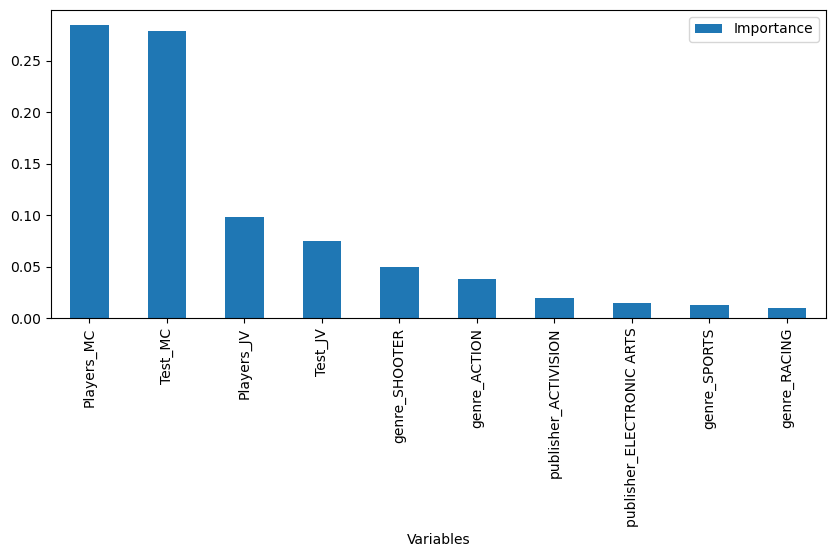

In [7]:
##### ARBRE DE DECISION CLASSIFICATION

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)

# Scores
print('Score entrainement : ', model.score(X_train_sc, y_train))
print('Score test : ', model.score(X_test_sc, y_test))

# Matrice de confusion
display(pd.crosstab(y_test, y_pred, rownames = ['Réalité'], colnames = ['Prédictions']))

# Rapport de classification
print(classification_report(y_test, y_pred))

# Importances des features
feat_importance = pd.DataFrame({'Variables' : X.columns, 'Importance' : model.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False).nlargest(10, "Importance")
feat_importance.plot.bar(x="Variables",y="Importance",figsize=(10,4));

ETUDE DU MAX_DEPTH

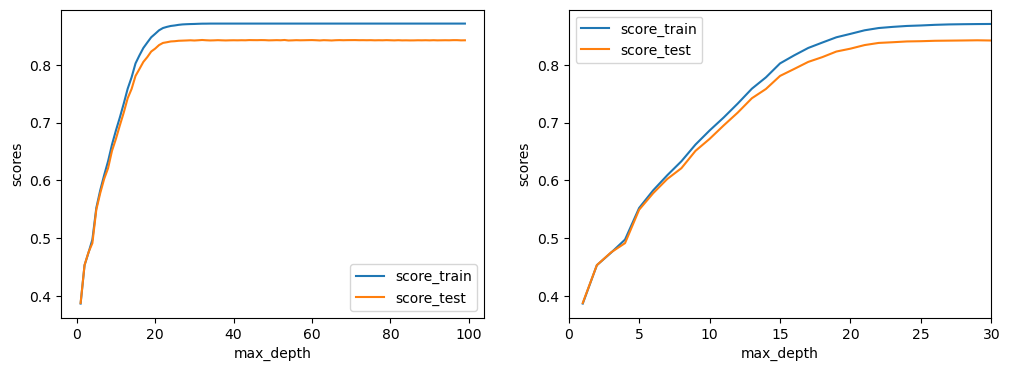

In [8]:
# Instanciation d'un modele DecisionTree dans une boucle for pour faire varier le max_depth et voir quand intervient le plateau
# environ 2min de calcul

score_train = []
score_test = []
predictions = []

for i in range(1,100,1):
  # Instanciation modele
  model = DecisionTreeClassifier(max_depth = i)

  # Entrainement
  model.fit(X_train_sc, y_train)

  # Prédiction
  predictions.append(model.predict(X_test_sc))
  score_train.append(model.score(X_train_sc, y_train))
  score_test.append(model.score(X_test_sc, y_test))

x = np.arange(1,100,1)
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(x, score_train, label = 'score_train')
plt.plot(x, score_test, label = 'score_test')
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.legend()
plt.subplot(122)
plt.plot(x, score_train, label = 'score_train')
plt.plot(x, score_test, label = 'score_test')
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.xlim([0,30])
plt.legend();

In [ ]:
# max_depth retenu aux alentours de 20-25, au dela, pas d'évolution du score

CLASSIFICATION : REGRESSION LOGISTIQUE

In [9]:
##### REGRESSION LOGISTIQUE

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
y_pred_lr = lr.predict(X_test_sc)

# Score
print('Score entrainement : ', lr.score(X_train_sc, y_train))
print('Score test : ', lr.score(X_test_sc, y_test))
print(classification_report(y_test, y_pred_lr))

# Matrice de confusion
display(pd.crosstab(y_test, y_pred_lr, rownames = ['Réalité'], colnames = ['Prédictions']))

Score entrainement :  0.49938367122138005
Score test :  0.4907421977445581
              precision    recall  f1-score   support

           1       0.50      0.37      0.43      4122
           2       0.46      0.30      0.37      4180
           3       0.43      0.57      0.49      5731
           4       0.59      0.65      0.62      5032

    accuracy                           0.49     19065
   macro avg       0.49      0.47      0.47     19065
weighted avg       0.49      0.49      0.48     19065



/home/linux/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prédictions,1,2,3,4
Réalité,,,,
1,1535,641,1575,371
2,605,1265,1530,780
3,660,655,3267,1149
4,254,177,1312,3289


Score entrainement :  0.8714888929686065
Score test :  0.8440073432992394
              precision    recall  f1-score   support

           1       0.85      0.76      0.80      4122
           2       0.81      0.84      0.82      4180
           3       0.82      0.86      0.84      5731
           4       0.90      0.90      0.90      5032

    accuracy                           0.84     19065
   macro avg       0.84      0.84      0.84     19065
weighted avg       0.84      0.84      0.84     19065



Prédictions,1,2,3,4
Réalité,,,,
1,3135,593,289,105
2,339,3504,306,31
3,209,213,4920,389
4,18,18,464,4532


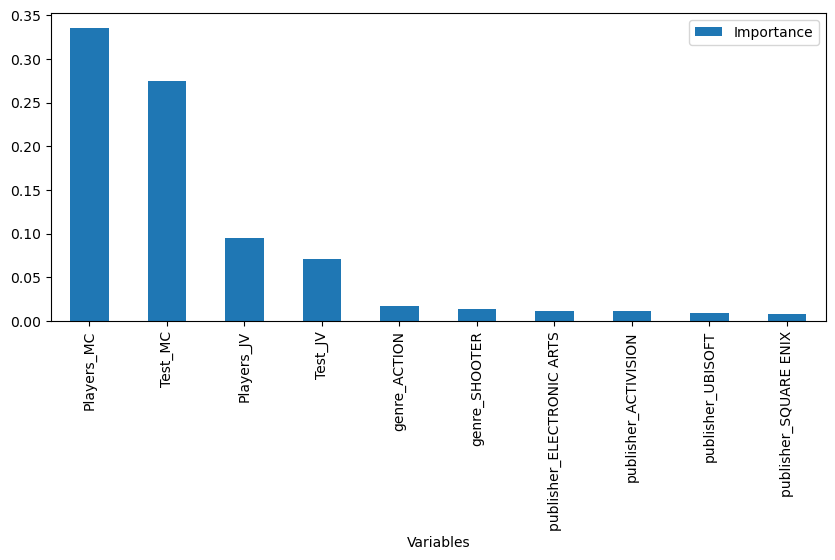

In [10]:
##### RANDOM FOREST CLASSIFICATION

rf = RandomForestClassifier(n_jobs = -1)
rf.fit(X_train_sc, y_train)

y_pred_rf = rf.predict(X_test_sc)
y_proba = rf.predict_proba(X_test_sc)

# Score
print('Score entrainement : ', rf.score(X_train_sc, y_train))
print('Score test : ', rf.score(X_test_sc, y_test))
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
display(pd.crosstab(y_test, y_pred_rf, rownames = ['Réalité'], colnames = ['Prédictions']))

# Importances des features
feat_importance = pd.DataFrame({'Variables' : X.columns, 'Importance' : rf.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False).nlargest(10, "Importance")
feat_importance.plot.bar(x="Variables",y="Importance",figsize=(10,4));

In [ ]:
# résultats tres corrects et tres proches du DecisionTreeClassifier

In [ ]:
##### GRIDSEARCH SUR UN KNN

knn = neighbors.KNeighborsClassifier()

params = {'n_neighbors':[3,5,7],'metric': ['minkowski','manhattan','chebyshev']}

grid_knn = model_selection.GridSearchCV(estimator=knn, param_grid=params)
grille = grid_knn.fit(X_train_sc, y_train)

print(grid_knn.best_params_)


{'metric': 'manhattan', 'n_neighbors': 3}


In [ ]:
##### KNN avec les paramètres optimaux - 36min de calcul

knn = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
knn.fit(X_train_sc, y_train)

y_pred_knn = knn.predict(X_test_sc)

# Score
print('Score entrainement : ', knn.score(X_train_sc, y_train))
print('Score test : ', knn.score(X_test_sc, y_test))
print(classification_report(y_test, y_pred_knn))

# Matrice de confusion Decision Tree
display(pd.crosstab(y_test, y_pred_knn, rownames = ['Réalité'], colnames = ['Prédictions']))

Score entrainement :  0.8601982742794199
Score test :  0.8514030946761081
              precision    recall  f1-score   support

           1       0.82      0.83      0.82      4122
           2       0.83      0.82      0.82      4180
           3       0.85      0.84      0.85      5731
           4       0.90      0.90      0.90      5032

    accuracy                           0.85     19065
   macro avg       0.85      0.85      0.85     19065
weighted avg       0.85      0.85      0.85     19065



Prédictions,1,2,3,4
Réalité,,,,
1,3424,479,154,65
2,395,3432,318,35
3,300,204,4832,395
4,61,30,397,4544


In [ ]:
##### KNN - 3min de calcul pour infos

knn = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
knn.fit(X_train_sc, y_train)

y_pred_knn = knn.predict(X_test_sc)

# Score
print('Score entrainement : ', knn.score(X_train_sc, y_train))
print('Score test : ', knn.score(X_test_sc, y_test))
print(classification_report(y_test, y_pred_knn))

# Matrice de confusion KNN
display(pd.crosstab(y_test, y_pred_knn, rownames = ['Réalité'], colnames = ['Prédictions']))

Score entrainement :  0.8601327073880773
Score test :  0.8514030946761081
              precision    recall  f1-score   support

           1       0.82      0.83      0.83      4122
           2       0.83      0.82      0.82      4180
           3       0.85      0.84      0.85      5731
           4       0.90      0.90      0.90      5032

    accuracy                           0.85     19065
   macro avg       0.85      0.85      0.85     19065
weighted avg       0.85      0.85      0.85     19065



Prédictions,1,2,3,4
Réalité,,,,
1,3427,475,153,67
2,396,3432,317,35
3,297,203,4833,398
4,60,35,397,4540


## Régression

In [ ]:
##### PREPROCESSING DU DATAFRAME

df = pd.read_csv("vg_mc_jv.csv", index_col = 0) # colonne Name en indice

# Dichotomisation des variables catégorielles
publisher = pd.get_dummies(df['Publisher'], prefix = 'publisher')
platform = pd.get_dummies(df['Platform'], prefix = 'platform')
genre = pd.get_dummies(df['Genre'], prefix = 'genre')

# Ajout des colonnes dichotomisée au DataFrame
df = df.join(publisher)
df = df.join(platform)
df = df.join(genre)

# Homogénéisation du barème des notes (tout est ramené sur 10)
df['Test_MC'] = df['Test_MC'] / 10
df['Test_JV'] = df['Test_JV'] / 2
df['Players_JV'] = df['Players_JV'] / 2

# Suppression des colonnes inutiles
df = df.drop(['Publisher','Platform','Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis = 1)
df = df.drop_duplicates()
# Feats & Target
X = df.drop('Global_Sales', axis = 1)
Y = df['Global_Sales']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# Scaler
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test,R² train,R² test
Decision Tree,0.029546,0.426542,0.042352,6.845638,0.205796,2.616417,0.99306,-0.709865


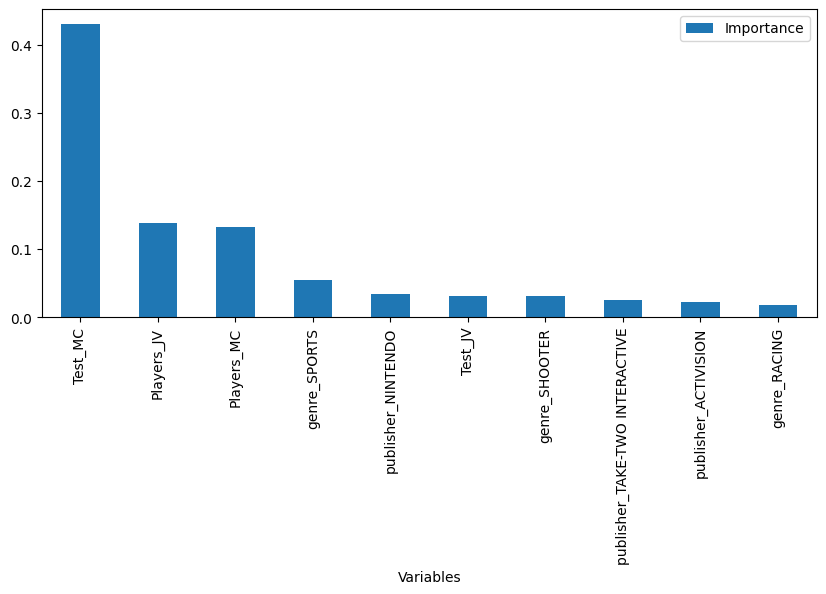

In [ ]:
##### MODELE ARBRE DE DECISION REGRESSION

dtr = DecisionTreeRegressor() 
dtr.fit(X_train_sc, y_train)

y_pred_decision_tree = dtr.predict(X_test_sc)
y_pred_train_decision_tree = dtr.predict(X_train_sc)

##### Métriques

# jeu d'entraînement
r2_decision_tree_train = dtr.score(X_train_sc,y_train)
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)


# jeu de test 
r2_decision_tree_test = dtr.score(X_test_sc, y_test)
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)

# Creation d'un dataframe pour comparer les metriques 
data = {'MAE train': mae_decision_tree_train,
        'MAE test': mae_decision_tree_test,
        'MSE train': mse_decision_tree_train,
        'MSE test': mse_decision_tree_test,
        'RMSE train': rmse_decision_tree_train,
        'RMSE test': rmse_decision_tree_test,
        'R² train' : r2_decision_tree_train, 
        'R² test':r2_decision_tree_test}
  
# DataFrame de metrics
df = pd.DataFrame(data, index = ['Decision Tree'])


##### Importances des features
feat_importance = pd.DataFrame({'Variables' : X.columns, 'Importance' : dtr.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False).nlargest(10, "Importance")
feat_importance.plot.bar(x="Variables",y="Importance",figsize=(10,4));

df.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test,R² train,R² test
Decision Tree,0.029546,0.469284,0.042352,7.918320,0.205796,2.813951,0.99306,-0.977793
Random Forest,0.204175,0.520375,0.519410,2.309057,0.720701,1.519558,0.91489,0.423257


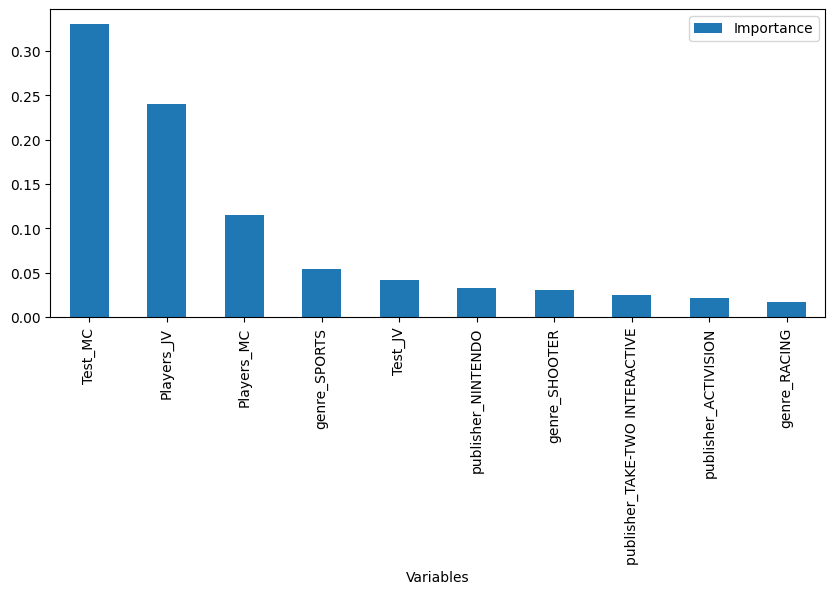

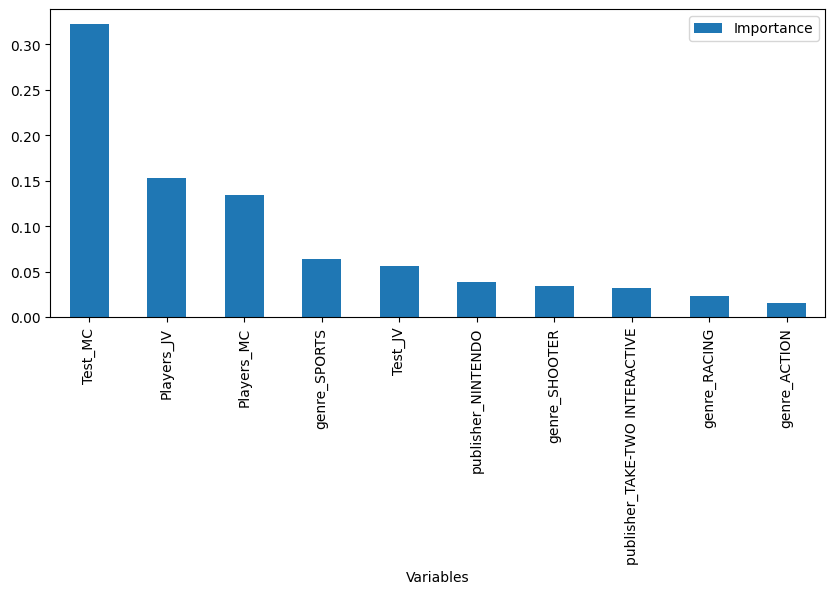

In [ ]:
##### COMPARAISON DES METRICS : DECISION TREE ET RANDOM FOREST

score_train = []
score_test = []

### DecisionTree

regressor_decision_tree = DecisionTreeRegressor(random_state=0) 
regressor_decision_tree.fit(X_train_sc, y_train)

y_pred_decision_tree = regressor_decision_tree.predict(X_test_sc)
y_pred_train_decision_tree = regressor_decision_tree.predict(X_train_sc)

score_train.append(regressor_decision_tree.score(X_train_sc, y_train))
score_test.append(regressor_decision_tree.score(X_test_sc, y_test))

# jeu d'entraînement 
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)

# jeu de test 
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)

### RandomForest

regressor_random_forest = RandomForestRegressor(random_state=0) 
regressor_random_forest.fit(X_train_sc, y_train)

y_pred_random_forest = regressor_random_forest.predict(X_test_sc)
y_pred_random_forest_train = regressor_random_forest.predict(X_train_sc)

score_train.append(regressor_random_forest.score(X_train_sc, y_train))
score_test.append(regressor_random_forest.score(X_test_sc, y_test))

# jeu d'entraînement 
mae_random_forest_train = mean_absolute_error(y_train,y_pred_random_forest_train)
mse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=True)
rmse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=False)

# jeu de test 
mae_random_forest_test = mean_absolute_error(y_test,y_pred_random_forest)
mse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=True)
rmse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=False)

# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data = {'MAE train': [mae_decision_tree_train, mae_random_forest_train],
        'MAE test': [mae_decision_tree_test, mae_random_forest_test],
        'MSE train': [mse_decision_tree_train,mse_random_forest_train],
        'MSE test': [mse_decision_tree_test,mse_random_forest_test],
        'RMSE train': [rmse_decision_tree_train, rmse_random_forest_train],
        'RMSE test': [rmse_decision_tree_test, rmse_random_forest_test],
        'R² train' : score_train, 
        'R² test':score_test}
  
# DataFrame de metrics
df = pd.DataFrame(data, index = ['Decision Tree', 'Random Forest '])

##### Importances des features

feat_importance_dtr = pd.DataFrame({'Variables' : X.columns, 'Importance' : regressor_decision_tree.feature_importances_})
feat_importance_dtr = feat_importance_dtr.sort_values(by='Importance', ascending=False).nlargest(10, "Importance")
feat_importance_dtr.plot.bar(x="Variables",y="Importance",figsize=(10,4));

feat_importance_rf = pd.DataFrame({'Variables' : X.columns, 'Importance' : regressor_random_forest.feature_importances_})
feat_importance_rf = feat_importance_rf.sort_values(by='Importance', ascending=False).nlargest(10, "Importance")
feat_importance_rf.plot.bar(x="Variables",y="Importance",figsize=(10,4));

df.head()

,coef_
Test_JV,1.361969e+00
Players_JV,-1.923927e+00
Test_MC,5.501768e+00
Players_MC,-1.983438e+00
publisher_1C COMPANY,1.969136e+11
publisher_2D BOY,1.969136e+11
publisher_3DO,1.969136e+11
publisher_505 GAMES,1.969136e+11
publisher_ACCLAIM ENTERTAINMENT,1.969136e+11
publisher_ACKKSTUDIOS,1.969136e+11


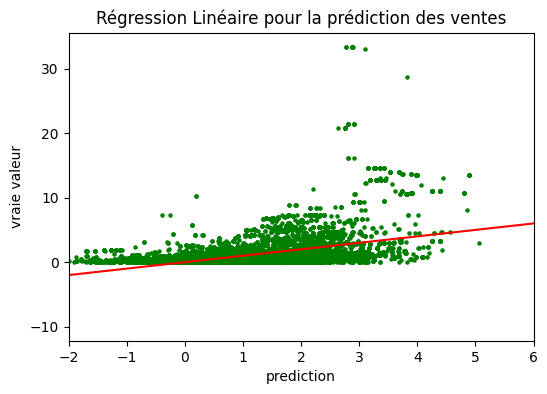

In [ ]:
##### MODELE DE REGRESSION LINEAIRE


linereg = LinearRegression()
linereg.fit(X_train_sc, y_train)

coef = pd.DataFrame({'coef_': linereg.coef_}, index = X.columns)
display(coef.head(10))

pred_test = linereg.predict(X_test_sc)

x  = [-10,10]
plt.figure(figsize = (6,4))
plt.scatter(pred_test, y_test, c='green', s  = 5)
plt.plot(x,x, color = 'red')
plt.xlim((-2,6))
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Régression Linéaire pour la prédiction des ventes')

plt.show()

# Rééchantillonnage

In [ ]:
score_train = [model.score(X_train_sc, y_train)]
score_test = [model.score(X_test_sc, y_test)]

##### OVERSAMPLING

# Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train_sc, y_train)

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_ro, y_ro)
y_pred_ro = clf.predict(X_test_sc)

score_train.append(clf.score(X_ro, y_ro))
score_test.append(clf.score(X_test_sc, y_test))


# SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train_sc, y_train)

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_sm, y_sm)
y_pred_sm = clf.predict(X_test_sc)

score_train.append(clf.score(X_sm, y_sm))
score_test.append(clf.score(X_test_sc, y_test))

##### UNDERSAMPLING

# Random Undersampling
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train_sc, y_train)

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_ru, y_ru)
y_pred_ru = clf.predict(X_test_sc)

score_train.append(clf.score(X_ru, y_ru))
score_test.append(clf.score(X_test_sc, y_test))

"""# Centroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train_sc, y_train)
score_train.append(clf.score(X_cc, y_cc))
score_test.append(clf.score(X_test_sc, y_test))"""

##### DATAFRAME DES SCORES

data = {'Score train':score_train,
        'Score test':score_test}

df = pd.DataFrame(data, index = ['Avant Ré-échantillonage','Random Oversampling', 'SMOTE','Random Undersampling'])
df.head()

,Score train,Score test
Avant Ré-échantillonage,0.871502,0.842696
Random Oversampling,0.878487,0.855494
SMOTE,0.878018,0.855442
Random Undersampling,0.877557,0.854865


# Correctif apporté aux erreurs - doublons

In [15]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


df = pd.read_csv("vg_mc_jv.csv")

# Dichotomisation des variables catégorielles et de la variable cible
publisher = pd.get_dummies(df['Publisher'], prefix = 'publisher')
platform = pd.get_dummies(df['Platform'], prefix = 'platform')
genre = pd.get_dummies(df['Genre'], prefix = 'genre')

df['y'] = pd.qcut(df['Global_Sales'], q = [0, 0.25, 0.5, 0.75, 1], labels = [1,2,3,4])

# Ajout des colonnes dichotomisée au DataFrame
df = df.join(publisher)
df = df.join(platform)
df = df.join(genre)

# Homogénéisation du barème des notes (tout est ramené sur 10)
df['Test_MC'] = df['Test_MC'] / 10
df['Test_JV'] = df['Test_JV'] / 2
df['Players_JV'] = df['Players_JV'] / 2

# Suppression des colonnes inutiles
df = df.drop(['Name','Publisher','Platform','Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis = 1)
df = df.drop_duplicates()

# Feats & Target
X = df.drop(['y','Global_Sales'], axis = 1)
Y_clf = df['y']

# TTS
X_train, X_test, y_train, y_test = train_test_split(X,Y_clf, test_size = 0.2)

# Scaler
sc = MinMaxScaler()
Xtrain_sc = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
Xtest_sc = pd.DataFrame(sc.fit_transform(X_test), columns = X.columns)

###### ARBRE DE DECISION CLASSIFICATION
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(Xtrain_sc, y_train)

print("Arbre décision classification")
print("Train :", dtc.score(Xtrain_sc,y_train))
print("Test :", dtc.score(Xtest_sc,y_test))
print('\n')

###### KNN CLASSIFICATION
knn_clf = KNeighborsClassifier()
knn_clf.fit(Xtrain_sc,y_train)

print('KNN classification')
print("Train :", knn_clf.score(Xtrain_sc,y_train))
print("Test :", knn_clf.score(Xtest_sc,y_test))
print('\n')


Arbre décision classification
Train : 0.9968639749117993
Test : 0.36363636363636365


KNN classification
Train : 0.6275970207761662
Test : 0.4263322884012539




In [17]:
##### GRIDSEARCH SUR UN KNN
from sklearn import model_selection

knn = KNeighborsClassifier()


params = {'n_neighbors':[3,5,7],'metric': ['minkowski','manhattan','chebyshev']}

grid_knn = model_selection.GridSearchCV(estimator=knn, param_grid=params)
grille = grid_knn.fit(Xtrain_sc, y_train)

print(grid_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5}


In [18]:
##### KNN WITH BEST RESULTS

knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')
knn.fit(Xtrain_sc,y_train)
y_pred_knn = knn.predict(Xtest_sc)

print("KNN with best_params :")
print("Train :", knn.score(Xtrain_sc, y_train))
print("Test", knn.score(Xtest_sc, y_test))
print("\n")
print(classification_report(y_test, y_pred_knn))

# Matrice de confusion
display(pd.crosstab(y_test, y_pred_knn, rownames = ['Réalité'], colnames = ['Prédictions']))


KNN with best_params :
Train : 0.6389651117208938
Test 0.43260188087774293


              precision    recall  f1-score   support

           1       0.48      0.52      0.50       149
           2       0.36      0.35      0.36       171
           3       0.35      0.32      0.34       164
           4       0.53      0.55      0.54       154

    accuracy                           0.43       638
   macro avg       0.43      0.44      0.43       638
weighted avg       0.43      0.43      0.43       638



Prédictions,1,2,3,4
Réalité,,,,
1,78,37,22,12
2,53,60,35,23
3,21,49,53,41
4,10,19,40,85


In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


df = pd.read_csv("vg_mc_jv.csv")

score_train = []
score_test = []

# Dichotomisation des variables catégorielles et de la variable cible
publisher = pd.get_dummies(df['Publisher'], prefix = 'publisher')
platform = pd.get_dummies(df['Platform'], prefix = 'platform')
genre = pd.get_dummies(df['Genre'], prefix = 'genre')

# Ajout des colonnes dichotomisée au DataFrame
df = df.join(publisher)
df = df.join(platform)
df = df.join(genre)

# Homogénéisation du barème des notes (tout est ramené sur 10)
df['Test_MC'] = df['Test_MC'] / 10
df['Test_JV'] = df['Test_JV'] / 2
df['Players_JV'] = df['Players_JV'] / 2

# Suppression des colonnes inutiles
df = df.drop(['Name','Publisher','Platform','Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis = 1)
df = df.drop_duplicates()

# Feats & Target
X = df.drop(['Global_Sales'], axis = 1)
Y_reg = df['Global_Sales']

# TTS
X_train, X_test, y_train, y_test = train_test_split(X,Y_reg, test_size = 0.2)

# Scaler
sc = MinMaxScaler()
Xtrain_sc = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
Xtest_sc = pd.DataFrame(sc.fit_transform(X_test), columns = X.columns)

### DecisionTree

regressor_decision_tree = DecisionTreeRegressor(random_state=0) 
regressor_decision_tree.fit(Xtrain_sc, y_train)

y_pred_decision_tree = regressor_decision_tree.predict(Xtest_sc)
y_pred_train_decision_tree = regressor_decision_tree.predict(Xtrain_sc)

score_train.append(regressor_decision_tree.score(Xtrain_sc, y_train))
score_test.append(regressor_decision_tree.score(Xtest_sc, y_test))

# jeu d'entraînement 
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)

# jeu de test 
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)

### KNN

regressor_knn = KNeighborsRegressor() 
regressor_knn.fit(Xtrain_sc, y_train)

y_pred_regressor_knn = regressor_knn.predict(Xtest_sc)
y_pred_regressor_knn_train = regressor_knn.predict(Xtrain_sc)

score_train.append(regressor_knn.score(Xtrain_sc, y_train))
score_test.append(regressor_knn.score(Xtest_sc, y_test))

# jeu d'entraînement 
mae_random_forest_train = mean_absolute_error(y_train,y_pred_regressor_knn_train)
mse_random_forest_train = mean_squared_error(y_train,y_pred_regressor_knn_train,squared=True)
rmse_random_forest_train = mean_squared_error(y_train,y_pred_regressor_knn_train,squared=False)

# jeu de test 
mae_random_forest_test = mean_absolute_error(y_test,y_pred_regressor_knn)
mse_random_forest_test = mean_squared_error(y_test,y_pred_regressor_knn,squared=True)
rmse_random_forest_test = mean_squared_error(y_test,y_pred_regressor_knn,squared=False)

# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data = {'MAE train': [mae_decision_tree_train, mae_random_forest_train],
        'MAE test': [mae_decision_tree_test, mae_random_forest_test],
        'MSE train': [mse_decision_tree_train,mse_random_forest_train],
        'MSE test': [mse_decision_tree_test,mse_random_forest_test],
        'RMSE train': [rmse_decision_tree_train, rmse_random_forest_train],
        'RMSE test': [rmse_decision_tree_test, rmse_random_forest_test],
        'R² train' : score_train, 
        'R² test':score_test}
  
# DataFrame de metrics
datareg = pd.DataFrame(data, index = ['Decision Tree', 'KNN'])
datareg

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test,R² train,R² test
Decision Tree,0.009341,1.279867,0.024893,20.701023,0.157777,4.549838,0.997076,-4.636654
KNN,0.803603,1.020492,4.243073,5.933406,2.059872,2.435858,0.501659,-0.615599
